# Polynomial Regression

**Importing Necessary Files**

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn.preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

**Import the 'Boston.csv' data file**

In [3]:
# write code here
data = pd.read_csv("Boston.csv")

In [4]:
# Write code here
df = data 

**Display the head of data**

In [5]:
# Write code here
df.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Creating Independent and Dependent Variables

In [6]:
# Write code here
X = df.drop(['median home price'], axis=1)
Y = df[['median home price']]
print(X.shape)
print(Y.shape)

(506, 13)
(506, 1)


### Normalizing Data using MinMax scaler

In [7]:
columnss = ['Crime Rate','Residential Proportion','non-retail business acres/Town','Charles River',
            'NO2 concentration','Average Rooms/Dwelling.','Prior Built Units Proportion','Distance to Employment Centres',
            'Radial Highways Distance','ValueProperty/tax rate','Teacher/town','blacks/town','Lower Status Percent']

In [8]:
# Write code here
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled_minmax = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled_minmax,columns= columnss)
X.head()


,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


### Splitting training and testing Data

In [9]:
# Write code here
from sklearn.model_selection import train_test_split
xtrain ,xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=25,shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(354, 13) (354, 1)
(152, 13) (152, 1)


### Applying Linear Regression

In [10]:
#Write the code here
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
#Write code here
model.fit(xtrain, ytrain)

LinearRegression()

Getting the predicted values on training data set in train_pred

In [12]:
#Write code here
train_pred = model.predict(xtrain)

Getting the predicted values on test data set in test_pred

In [17]:
#Write code here
test_pred= model.predict(xtest)

### Finding R2 Score

In [18]:
#Write code here for testing data
from sklearn.metrics import r2_score
r2_test_lr= r2_score(ytest,test_pred)

In [19]:
#Write code here for training data
r2_train_lr= r2_score(ytrain,train_pred)

In [20]:
print('R2 score for testing:',r2_test_lr )
print('R2 score for training:',r2_train_lr )

R2 score for testing: 0.7133593313710358
R2 score for training: 0.7435787589010061


**Ploting Residual Plot**

In [21]:
!pip install yellowbrick

C:\Users\sunrise\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sunrise\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sunrise\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sunrise\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493

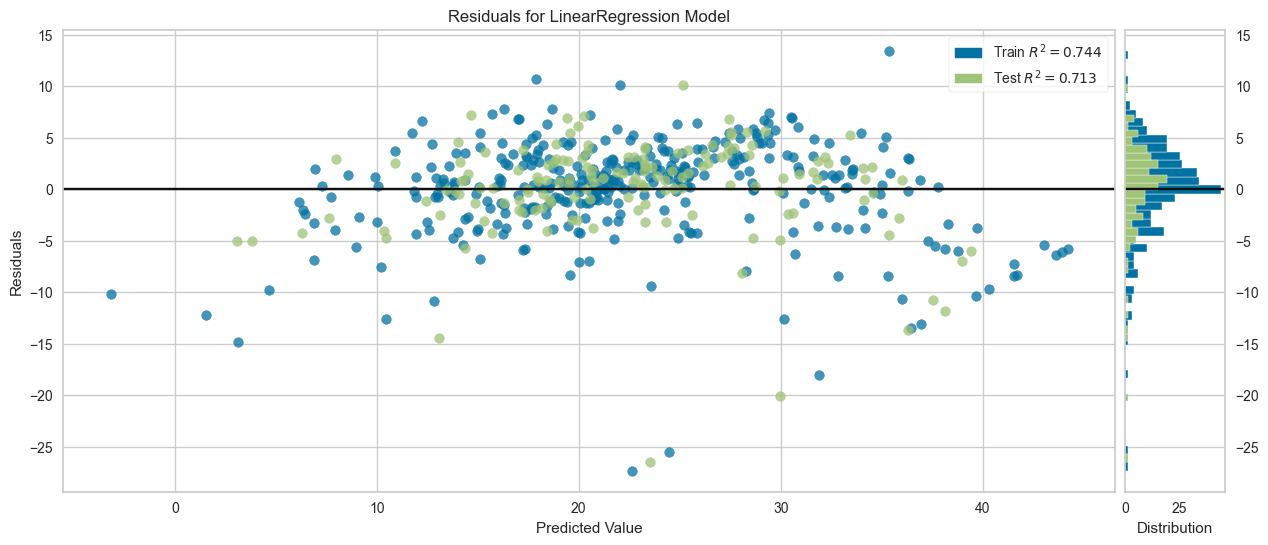

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [22]:
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15,6))
visualizer = ResidualsPlot(model)
visualizer.fit(xtrain.values, ytrain.values)  
visualizer.score(xtest.values, ytest.values)  
visualizer.poof()    

# Applying Polynomial Regression 

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly_features = PolynomialFeatures(degree=2)

In [25]:
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(xtrain)

In [26]:
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, ytrain)

LinearRegression()

In [27]:
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

In [28]:
# predicting on test data-set
X_test_poly=poly_features.fit_transform(xtest)
y_test_predict = poly_model.predict(X_test_poly)

In [29]:
# evaluating the model on training dataset
r2_train = r2_score(ytrain, y_train_predicted)

In [30]:
# evaluating the model on test dataset
r2_test = r2_score(ytest, y_test_predict)

In [31]:
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

The r2 score for training set is:  0.9322525327409263
The r2 score for testing set is:  0.8194893868475545
